In [9]:
import geopandas
bus_line = geopandas.read_file("datasets/mbtabus/MBTABUSROUTES_ARC.shp")
bus_line



SHAPE_ID MBTA_ROUTE MBTA_VARIA MBTA_ROU_1  CTPS_ROUTE  CTPS_ROU_1  \
0     160025         16          2       16_2          16        16.0   
1     160003         16          3       16_3          16        16.0   
2     050009         05          _        05_           5         5.0   
3     070011         07          2       07_2           7         7.0   
4     080015         08          9       08_9           8         8.0   
..       ...        ...        ...        ...         ...         ...   
918  1050022        105          1      105_1         105       105.0   
919   620062         62          4       62_4          62        62.0   
920   840033         84          1       84_1          84        84.0   
921   840034         84          2       84_2          84        84.0   
922   870108         87          _        87_          87        87.0   

     DIRECTION           ROUTE_DESC                         TRIP_HEADS  \
0            1   Route 16_2 inbound                              UMass   
1            1   Route 16_3 inbound                             Andrew   
2            0   Route 05_ outbound                         City Point   
3            0  Route 07_2 outbound       City Point via East First St   
4            0  Route 08_9 outbound  Harbor Point via South Bay Center   
..         ...                  ...                                ...   
918          1  Route 105_1 inbound                           Sullivan   
919          1   Route 62_4 inbound                            Alewife   
920          1   Route 84_1 inbound                            Alewife   
921          1   Route 84_2 inbound                            Alewife   
922          0   Route 87_ outbound                     Clarendon Hill   

     CTPS_ROU_2     SHAPE_LEN  \
0         16201  11447.693160   
1         16301   7182.299738   
2          5000   6566.593988   
3          7200   3152.476054   
4          8900  15339.996640   
..          ...           ...   
918      105101   9765.141899   
919       62401  18280.690446   
920       84101   7147.909410   
921       84201   7147.909410   
922       87000   7371.175199   

                                              geometry  
0    LINESTRING (231866.335 894511.836, 231854.966 ...  
1    LINESTRING (231866.335 894511.836, 231854.966 ...  
2    LINESTRING (236875.676 897653.501, 236875.838 ...  
3    LINESTRING (236371.249 900507.531, 236360.463 ...  
4    LINESTRING (233318.701 899904.902, 233323.933 ...  
..                                                 ...  
918  LINESTRING (235056.436 908529.799, 235048.896 ...  
919  LINESTRING (218163.375 915707.750, 218143.765 ...  
920  LINESTRING (225163.765 907289.762, 225122.456 ...  
921  LINESTRING (225163.765 907289.762, 225122.456 ...  
922  LINESTRING (234831.100 902372.374, 234859.104 ...  

[923 rows x 12 columns]

In [13]:
"""ax = bus_line.plot(column='TRIP_HEADS', 
                    legend=True, 
                    figsize=(100, 80))"""

"ax = bus_line.plot(column='TRIP_HEADS', \n                    legend=True, \n                    figsize=(100, 80))"

In [60]:
import geopandas
bus_node = geopandas.read_file("datasets/mbtabus/MBTABUSSTOPS_PT.shp")

# filter this datfraame to look for "CAMBRIDGE" in "TOWN" coulm in the pandas df
bus_node = bus_node[bus_node['TOWN'] == 'CAMBRIDGE']

bus_node.head()


STOP_ID                     STOP_NAME    TOWN  TOWN_ID  \
0     3077  Gallivan Blvd @ opp Marsh St  BOSTON       35   
1      841       Lagrange St @ Virgil Rd  BOSTON       35   
2      446        Norfolk St @ Nelson St  BOSTON       35   
3      847     Lagrange St opp Virgil St  BOSTON       35   
4     3079           Adams St @ Minot St  BOSTON       35   

                        geometry  
0  POINT (237120.669 892643.408)  
1  POINT (227915.195 892644.017)  
2  POINT (234385.661 892644.944)  
3  POINT (227912.601 892650.156)  
4  POINT (236644.812 892651.990)

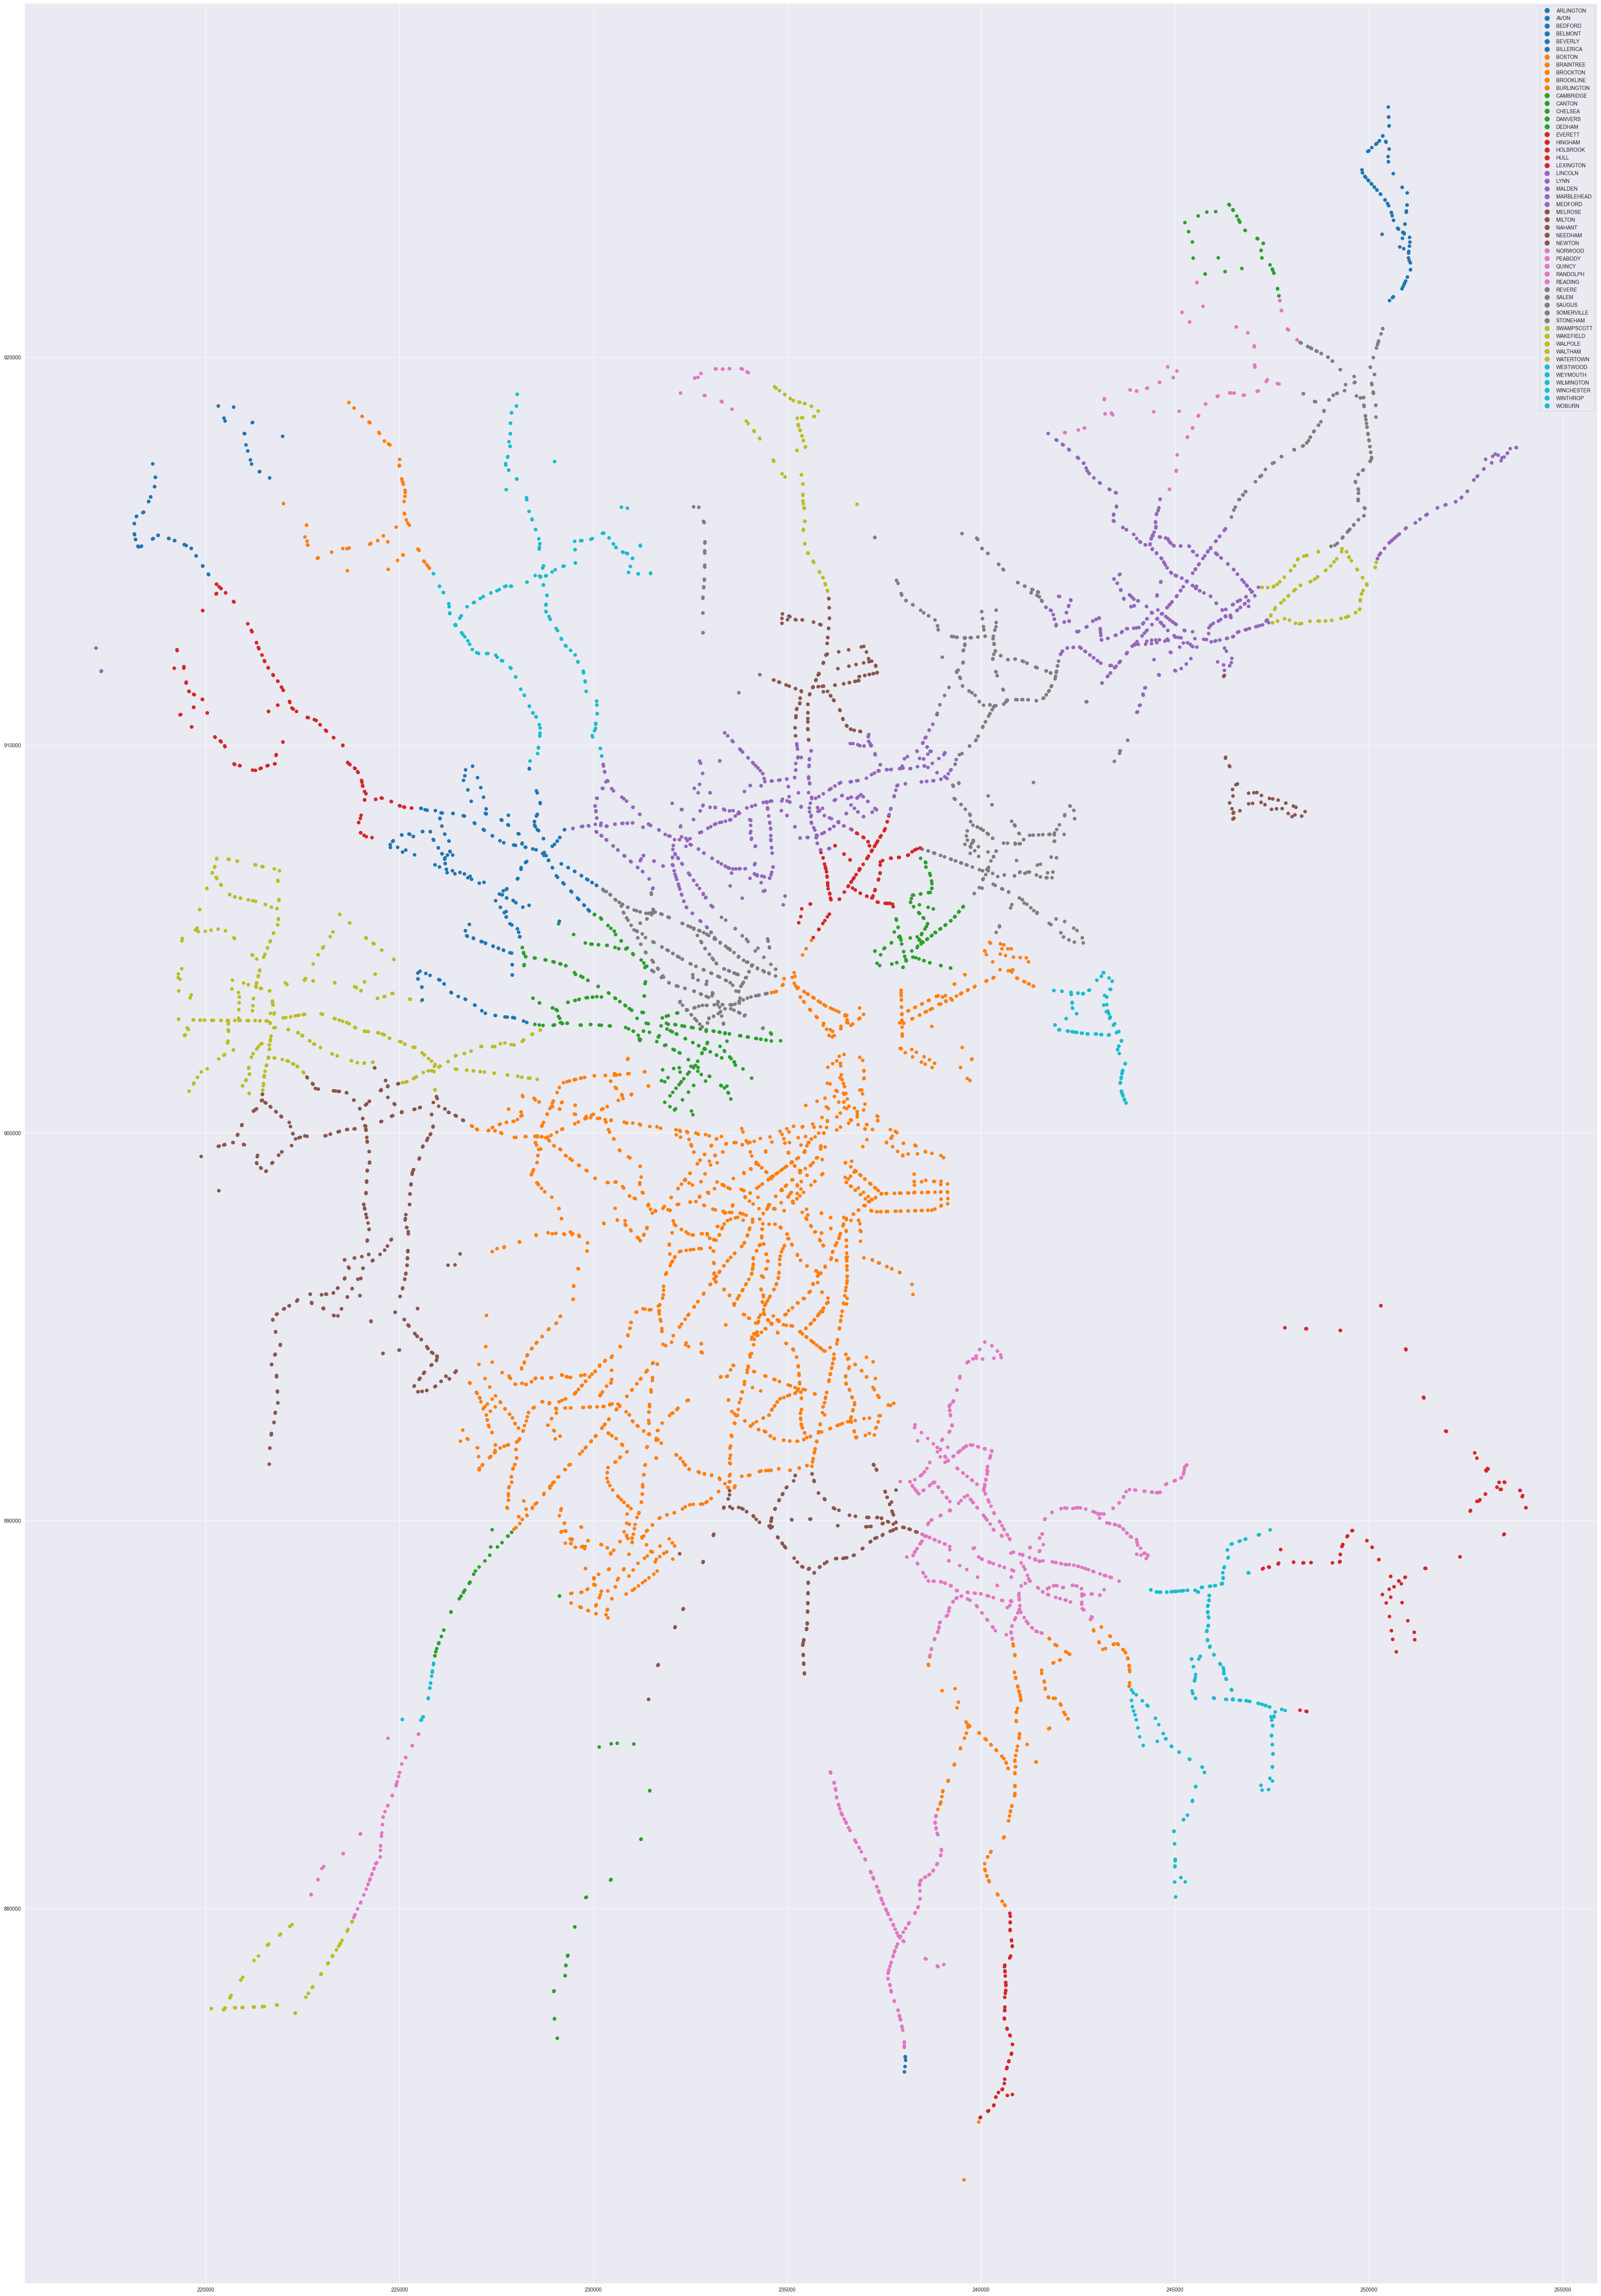

In [41]:
ax = bus_node.plot(column='TOWN', 
                    legend=True, 
                    figsize=(100, 80))

In [62]:
import pandas as pd
bike_station_df = pd.read_csv('datasets/current_bluebikes_stations.csv', header=1)

bike_station_df = bike_station_df[bike_station_df['District'] == 'Cambridge']

bike_station_df


Number                                       Name   Latitude  Longitude  \
6    M32026  359 Broadway - Broadway at Fayette Street  42.370803 -71.104412   
8    M32088                          55 Wheeler Street  42.390821 -71.143946   
12   M32054                           699 Mt Auburn St  42.375002 -71.148716   
15   M32060                              700 Huron Ave  42.380788 -71.154129   
16   M32064                               75 Binney St  42.365507 -71.080138   
..      ...                                        ...        ...        ...   
345  M32069                      Smith Pl at Wilson Rd  42.392397 -71.150583   
376  M32048                            Third at Binney  42.365445 -71.082771   
391  M32040                            University Park  42.362648 -71.100061   
393  M32057                  Vassal Lane at Tobin/VLUS  42.385368 -71.137757   
394  M32050      Verizon Innovation Hub 10 Ware Street  42.372509 -71.113054   

      District Public  Total docks  
6    Cambridge    Yes           23  
8    Cambridge    Yes           23  
12   Cambridge    Yes           25  
15   Cambridge    Yes           19  
16   Cambridge    Yes           19  
..         ...    ...          ...  
345  Cambridge    Yes           19  
376  Cambridge    Yes           15  
391  Cambridge    Yes           19  
393  Cambridge    Yes           19  
394  Cambridge    Yes           19  

[84 rows x 7 columns]

In [53]:
import shapely

In [59]:
from shapely.geometry import Point
import geopandas as gpd
import folium 


geometry = [Point(xy) for xy in zip(bike_station_df['Longitude'], bike_station_df['Latitude'])]

bike_station_gdf = geopandas.GeoDataFrame(bike_station_df, geometry=geometry)

#bike_station_gdf.explore()


In [58]:
import folium 
bus_node.explore(column = 'TOWN')
# bike_station_gdf.explore()


In [63]:
bus_arc.head()
#bus_arc['TRIP_HEADS'].value_counts()

NameError: name 'bus_arc' is not defined